In [271]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import re

from numpy.ma import MaskedArray

In [272]:
from bench import change_model

ch_mdl = change_model.ChangeModel.load("/Users/dkor/OneDrive - Nexus365/UKBB/change_models/invivo/normalisation_by_baseline/2D_2nd/SM_ball_sphere/watson_stick_zeppelin_sphere_ball_30000_samples_1.7_diff")

model_names = ch_mdl.model_names

/Users/dkor/opt/miniconda3/envs/benchenv_v3/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [273]:

def plot_middle_axial_slice(file_path, mask_path, brain_path, ax, vmax, cmap):
    img = nib.load(file_path)
    data = img.get_fdata()
    
    img = nib.load(brain_path)
    brain_data = img.get_fdata()
    
    if mask_path is not None:
        mask_img = nib.load(mask_path)
        mask_data = (mask_img.get_fdata()).astype(bool)
        #data = np.multiply(data, mask_data)
        
        #data = np.where(mask_data == 1, data, -0.3)  
        data = MaskedArray(data, mask=~mask_data)
    
    mid_slice_idx = data.shape[2] // 2
    mid_slice = data[:, :, mid_slice_idx].T
    brain_mid_slice = brain_data[:, :, mid_slice_idx].T
    im = ax.imshow(brain_mid_slice, cmap="gray")
    im = ax.imshow(mid_slice, cmap=cmap, origin="lower", vmin=0, vmax=vmax)
    
    
    
    
    param = re.split("_probability_", os.path.basename(file_path))[0]
    
    ax.set_title(os.path.basename(param))
    
    return im

def plot_probability_files_in_grid(directory_path, mask_path, brain_path,figsize=(15, 15), vmax=1.0):
    probability_files = [
        os.path.join(directory_path, f)
        for f in os.listdir(directory_path)
        if os.path.isfile(os.path.join(directory_path, f)) and "probability" in f and f.endswith(".nii.gz")
    ]
    
    inferred_files = [
        os.path.join(directory_path, f)
        for f in os.listdir(directory_path)
        if os.path.isfile(os.path.join(directory_path, f)) and "inferred" in f and f.endswith(".nii.gz")
    ]
    
    if not probability_files:
        print("No probability files found.")
        return
    
    n = len(probability_files)
    
    print(n)
    
    grid_size = int(np.ceil(np.sqrt(n)))
    
    fig, axes = plt.subplots(grid_size-1, grid_size, figsize=figsize)
    
    probability_files = np.sort(probability_files)
    
    for idx, file_path in enumerate(probability_files):
        row = idx // grid_size
        col = idx % grid_size
        im = plot_middle_axial_slice(file_path, mask_path, brain_path, axes[row, col], vmax, "autumn")
    
    plt.tight_layout()
    
    
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    
    
    
    plt.show()



18


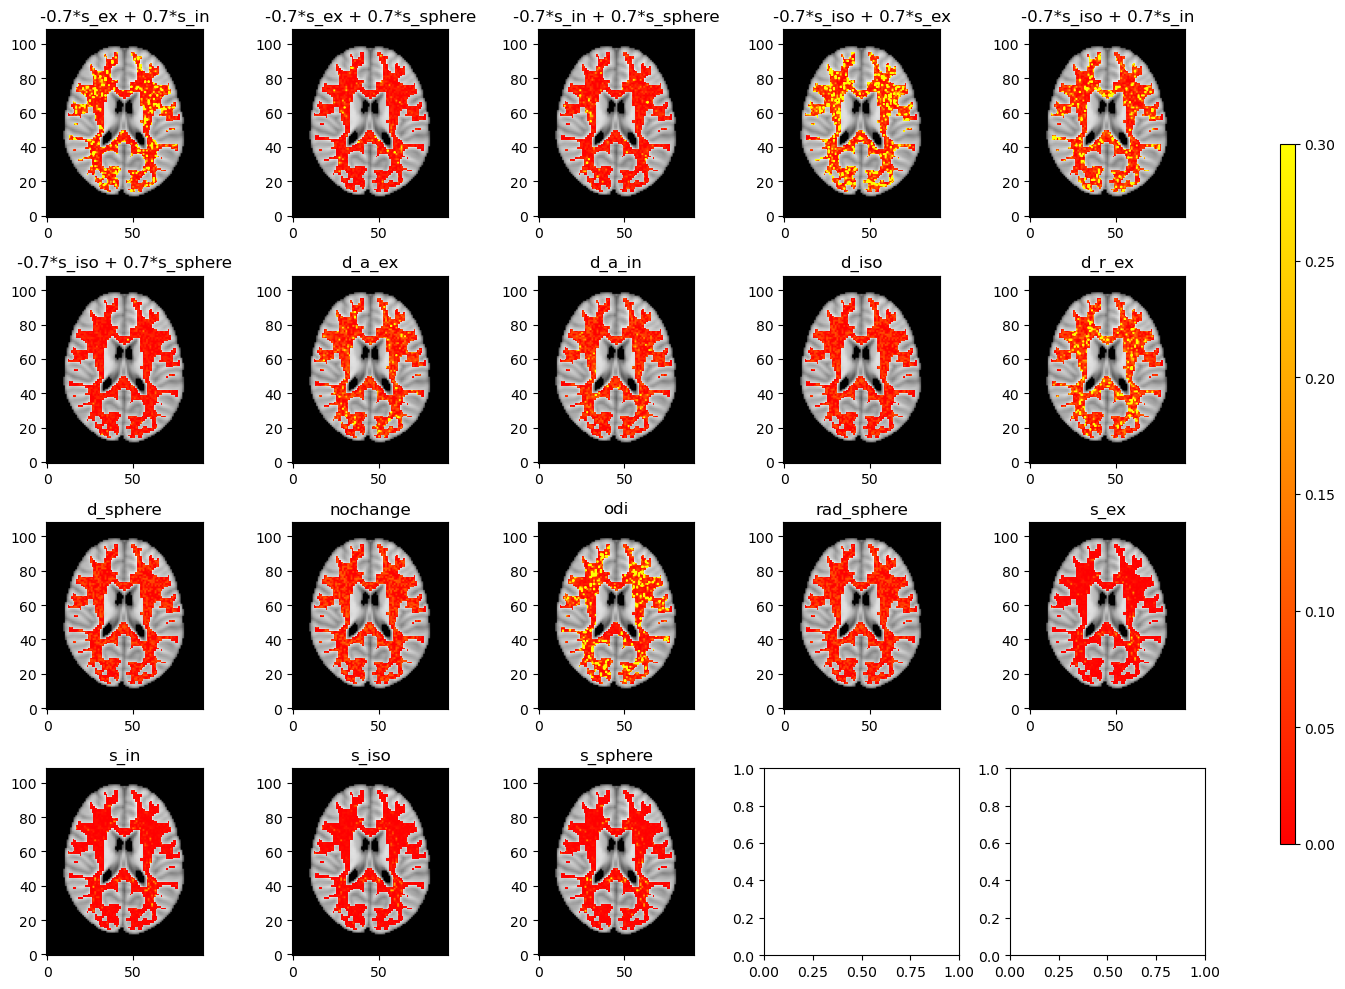

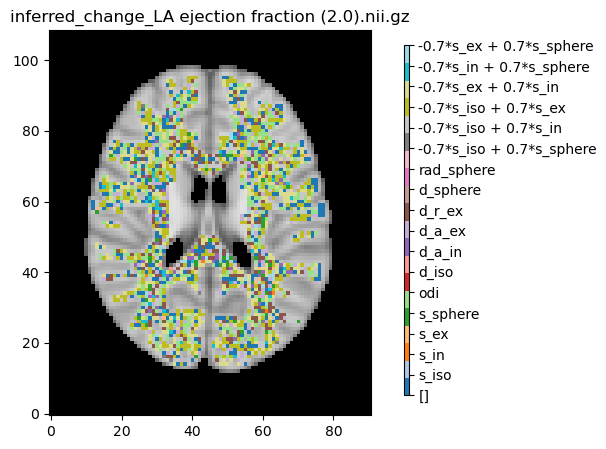

In [274]:
phenotype = "LA ejection fraction (2.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.3)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

18


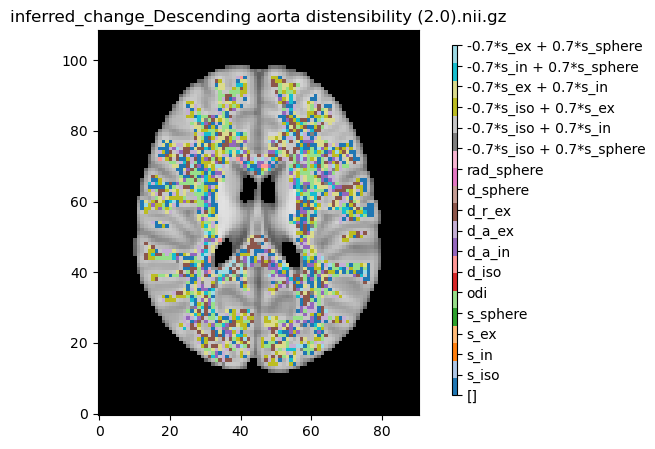

In [281]:
phenotype = "Descending aorta distensibility (2.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.5)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

18


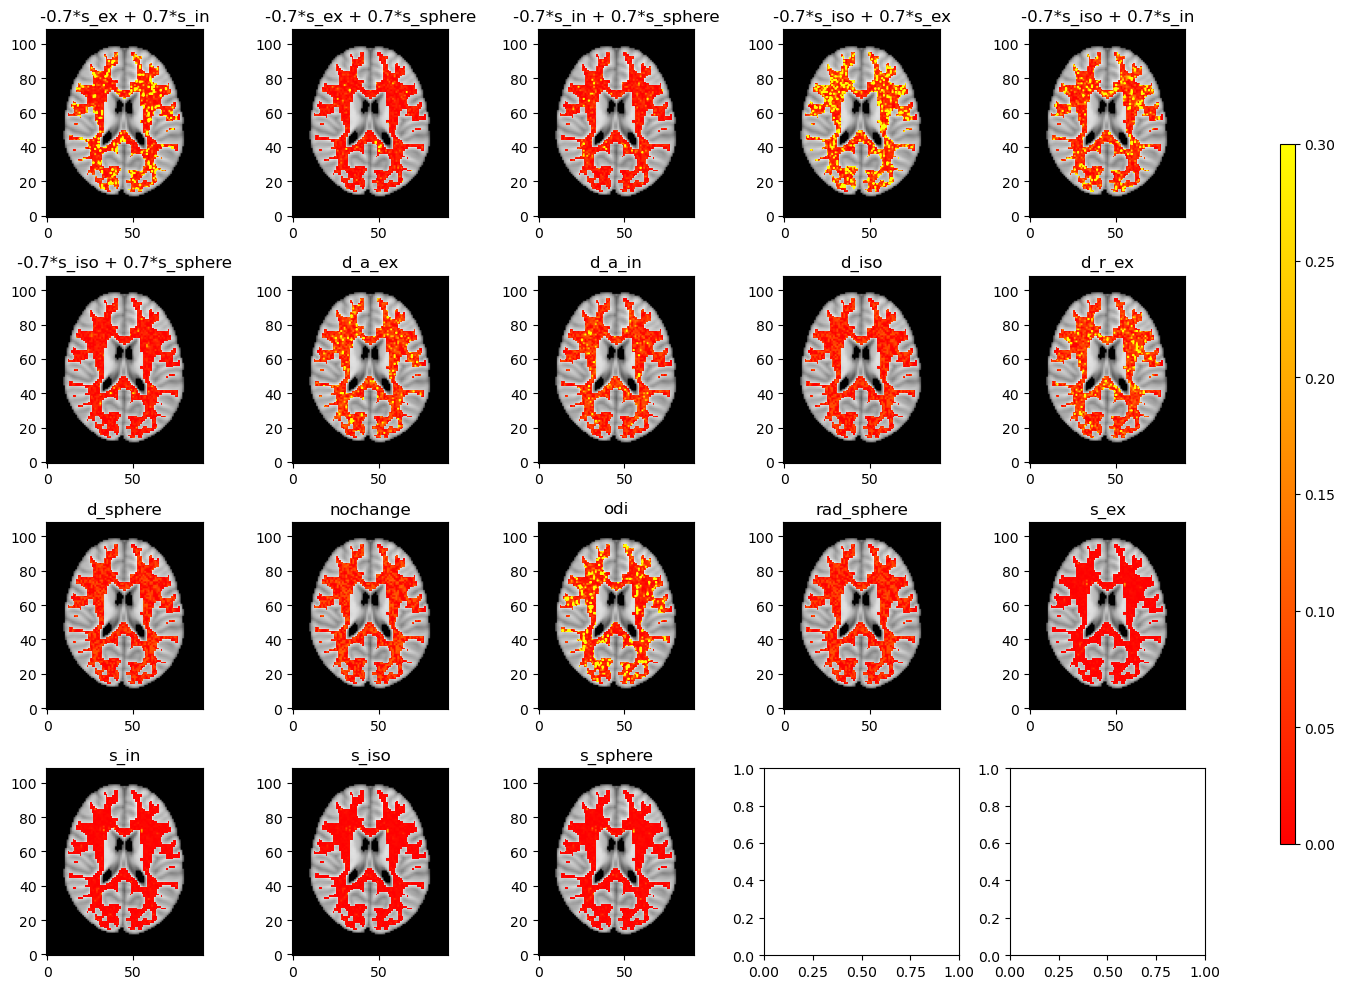

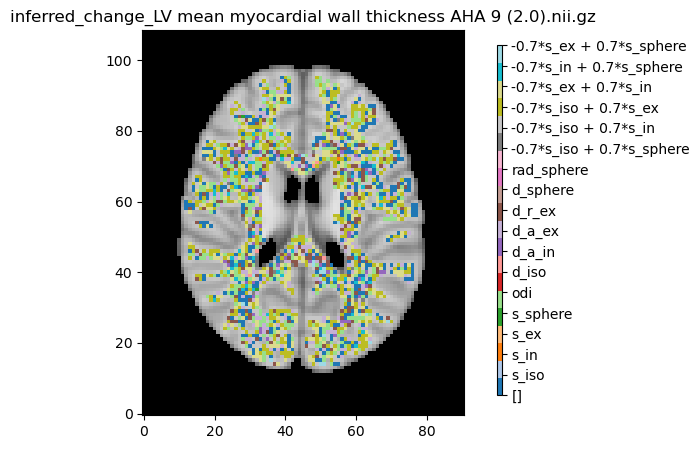

In [276]:
phenotype = "LV mean myocardial wall thickness AHA 9 (2.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.30)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

18


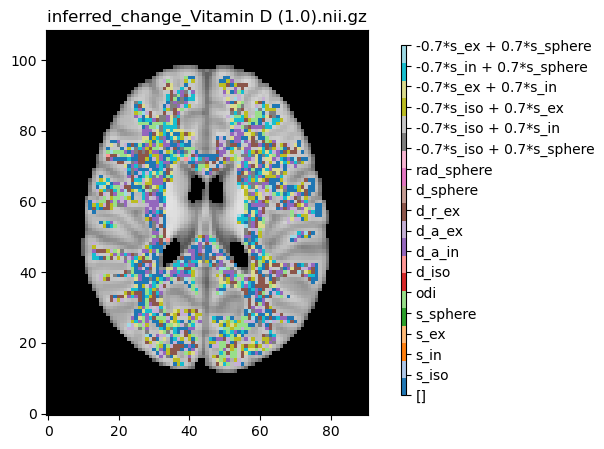

In [277]:
phenotype = "Vitamin D (1.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.3)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

18


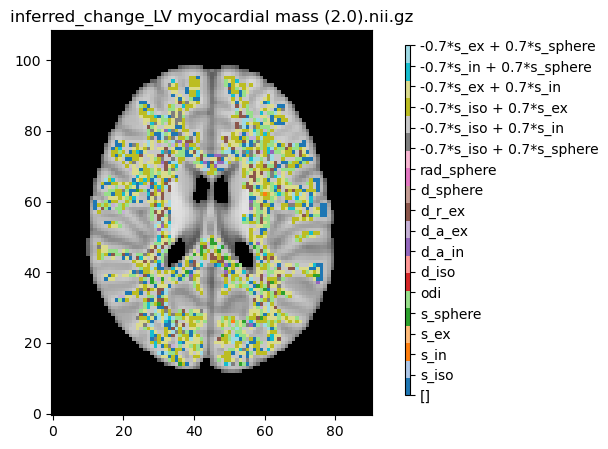

In [278]:
phenotype = "LV myocardial mass (2.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.5)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

18


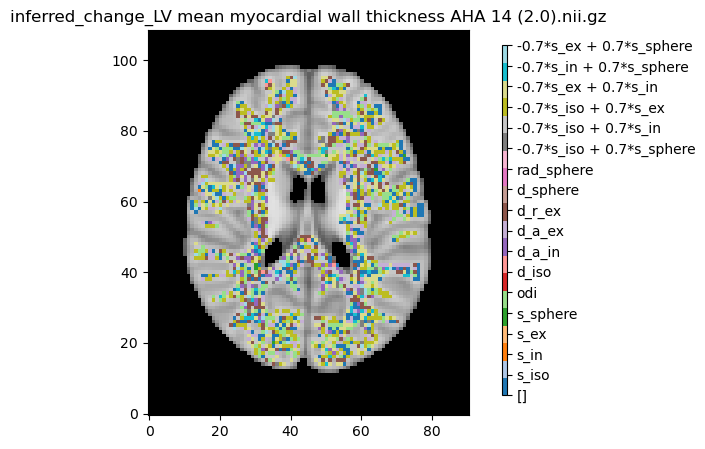

In [279]:
phenotype = "LV mean myocardial wall thickness AHA 14 (2.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.5)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

18


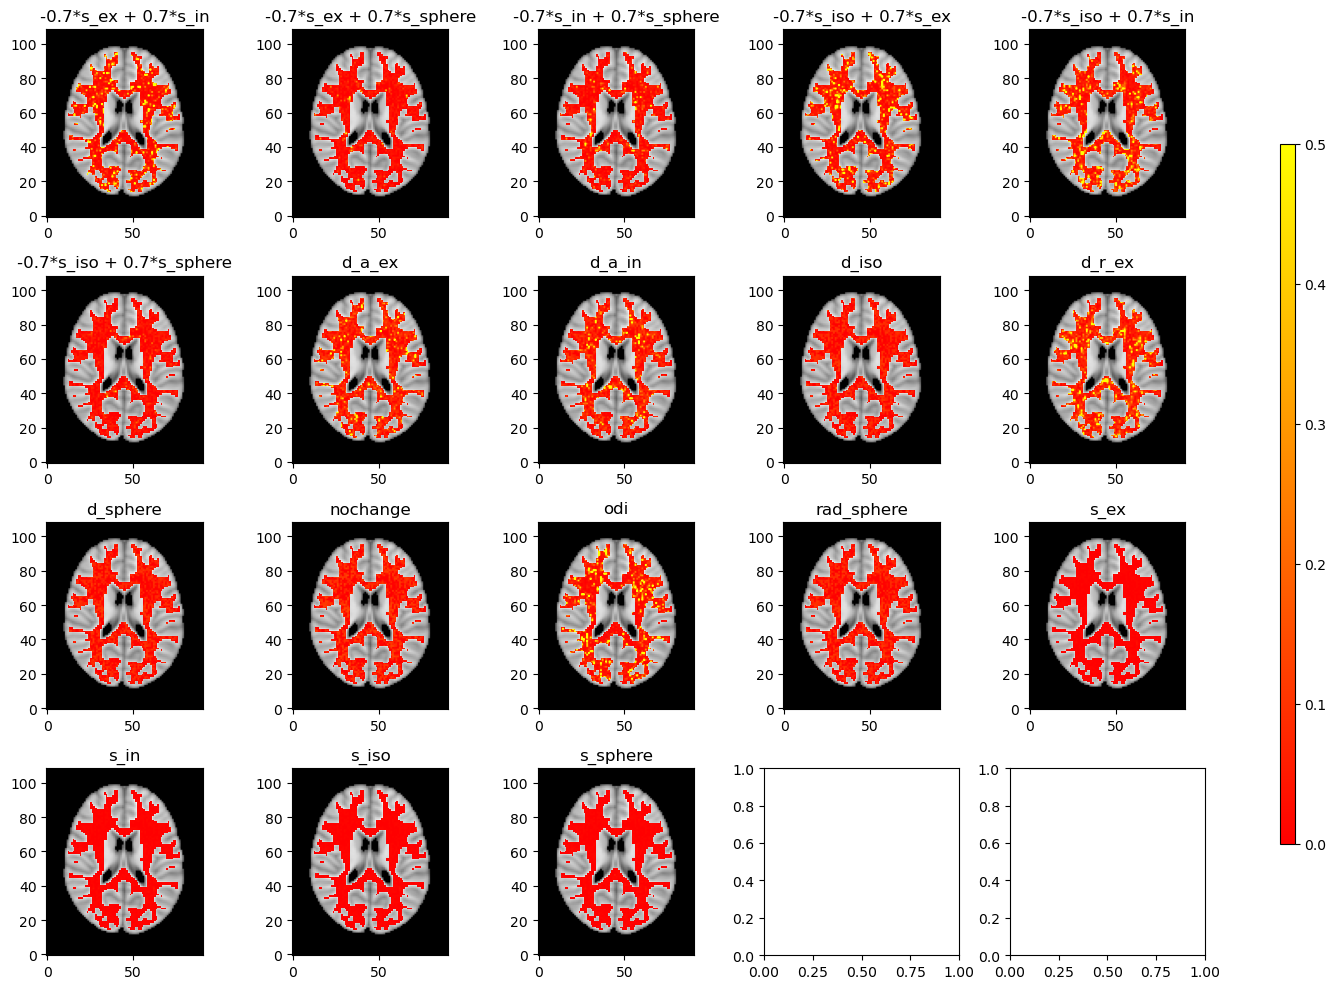

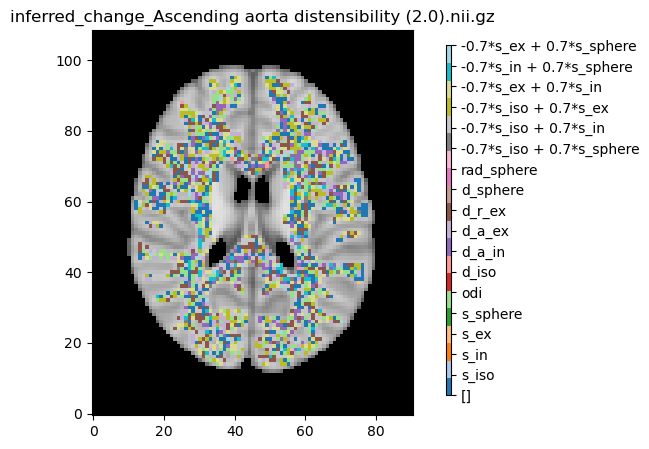

In [280]:
phenotype = "Ascending aorta distensibility (2.0)"

directory_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/valid_mask.nii.gz"
brain_path = "/Users/dkor/OneDrive - Nexus365/UKBB/MNI/standard/MNI152_T1_2mm_brain.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path,brain_path, figsize=(15, 10), vmax=0.5)

inferred_path = f"/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/subset/predictions/{phenotype}/inferred_change_{phenotype}.nii.gz"
fig, axes = plt.subplots(1, 1, figsize=(5,5))
im = plot_middle_axial_slice(inferred_path, mask_path, brain_path, axes, vmax=17, cmap="tab20")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(18))
cbar.set_ticklabels(model_names)

## SM ball

In [59]:
directory_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/pruning_v3/manually_chosen_SM_ball/predictions/LV ejection fraction (2.0)"  # Change this to your directory path
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/pruning_v3/GLM/valid_mask.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path, figsize=(15, 15))

12


12


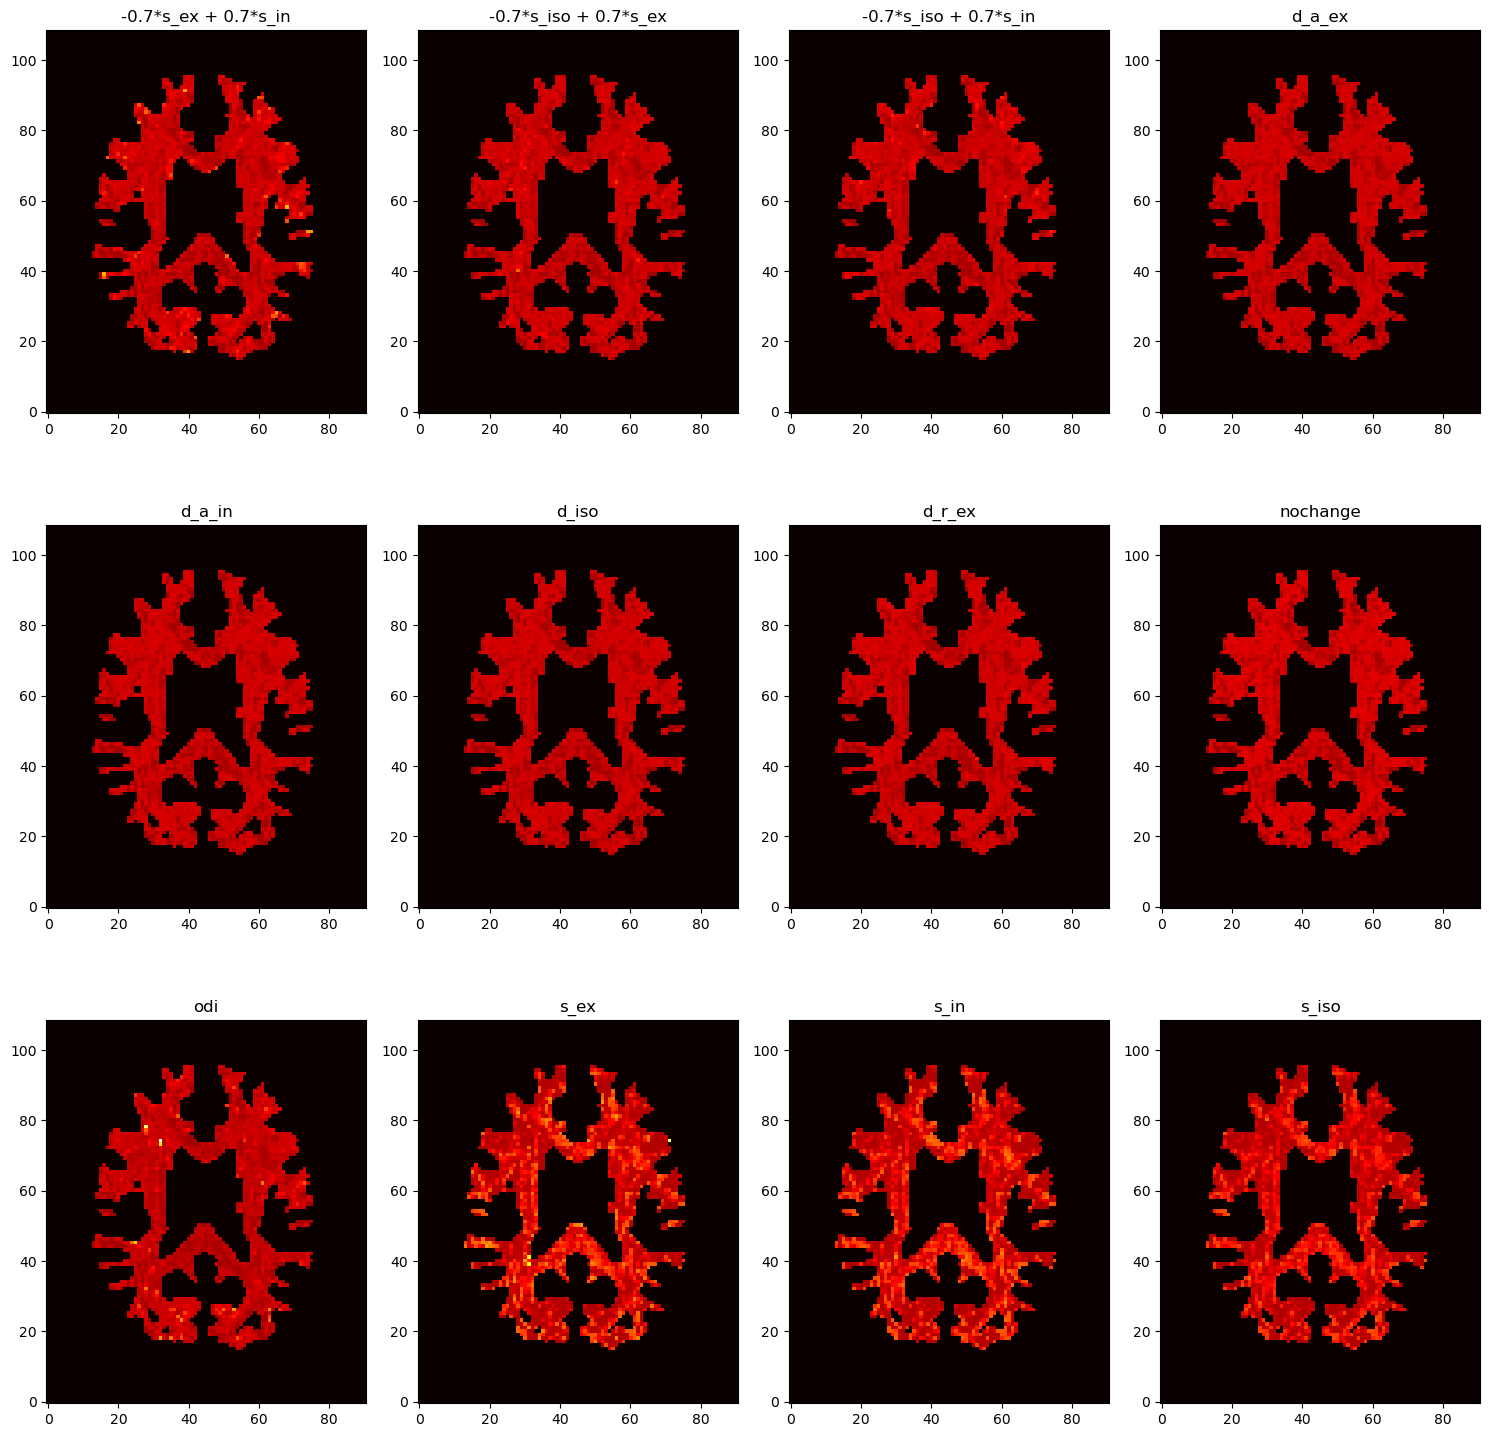

In [54]:
directory_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/pruning_v3/manually_chosen_SM_ball/predictions/RV stroke volume (2.0)"
mask_path = "/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/pruning_v3/GLM/valid_mask.nii.gz"
plot_probability_files_in_grid(directory_path,mask_path, figsize=(15, 15))